<a href="https://colab.research.google.com/github/Mahabalan2301/Galaxyprediction/blob/main/Finalreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/content/GalaxyZoo1_DR_table2 (1).csv')

# Sample 100,000 rows randomly
df_sampled = df.sample(n=100000, random_state=42)

# Preview the dataset
print("Sampled dataset shape:", df_sampled.shape)
df_sampled.head()


Sampled dataset shape: (100000, 16)


,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
569604,587739844317413728,15:41:37.92,+15:56:42.2,37,0.892,0.000,0.000,0.054,0.027,0.027,0.054,0.785,0.149,0,0,1
126043,587741421105643659,09:23:29.60,+24:28:45.9,36,0.111,0.833,0.028,0.000,0.000,0.028,0.861,0.111,0.861,1,0,0
27458,588015508219101372,03:34:34.85,-00:44:35.8,31,0.581,0.032,0.032,0.226,0.097,0.032,0.290,0.159,0.609,0,0,1
571157,587729776916693397,15:43:08.49,-02:11:15.9,31,0.323,0.000,0.000,0.065,0.226,0.387,0.065,0.294,0.080,0,0,1
206008,588017978347421846,10:38:59.37,+36:54:15.8,23,0.696,0.130,0.000,0.130,0.043,0.000,0.261,0.253,0.661,1,0,0


In [ ]:
# Drop irrelevant columns
df_sampled.drop(columns=['OBJID', 'RA', 'DEC'], inplace=True)


In [ ]:
def classify_galaxy(row):
    probs = {'Spiral': row['SPIRAL'],
             'Elliptical': row['ELLIPTICAL'],
             'Irregular': row['UNCERTAIN']}
    return max(probs, key=probs.get)

df_sampled['Class'] = df_sampled.apply(classify_galaxy, axis=1)


In [ ]:
df_sampled.drop(columns=['SPIRAL', 'ELLIPTICAL', 'UNCERTAIN'], inplace=True)


In [ ]:
df_sampled.dropna(inplace=True)


In [ ]:
 #Separate Features and Target
X = df_sampled.drop(columns=['Class'])
y = df_sampled['Class']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
#we are splitting data for training and splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (80000, 10)
Testing Data Shape: (20000, 10)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
lr = LogisticRegression(max_iter=1000)  # max_iter ensures convergence
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8887
Confusion Matrix:
 [[ 1479   382     0]
 [  334 11330   769]
 [    1   740  4965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1861
           1       0.91      0.91      0.91     12433
           2       0.87      0.87      0.87      5706

    accuracy                           0.89     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.89      0.89      0.89     20000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.87405
Confusion Matrix:
 [[ 1462   399     0]
 [  345 11178   910]
 [    0   865  4841]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1861
           1       0.90      0.90      0.90     12433
           2       0.84      0.85      0.85      5706

    accuracy                           0.87     20000
   macro avg       0.85      0.84      0.85     20000
weighted avg       0.87      0.87      0.87     20000



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8972
Confusion Matrix:
 [[ 1504   357     0]
 [  321 11420   692]
 [    0   686  5020]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1861
           1       0.92      0.92      0.92     12433
           2       0.88      0.88      0.88      5706

    accuracy                           0.90     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.90      0.90      0.90     20000



In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.90435
Confusion Matrix:
 [[ 1544   317     0]
 [  279 11485   669]
 [    0   648  5058]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1861
           1       0.92      0.92      0.92     12433
           2       0.88      0.89      0.88      5706

    accuracy                           0.90     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.90      0.90      0.90     20000



In [ ]:
import joblib
# Save Logistic Regression
joblib.dump(lr, '/content/drive/MyDrive/content/logistic_regression_model.pkl')

# Save KNN
joblib.dump(knn, '/content/drive/MyDrive/content/knn_model.pkl')

# Save Random Forest
joblib.dump(rf, '/content/drive/MyDrive/content/random_forest_model.pkl')

# Save Gradient Boosting
joblib.dump(gb, '/content/drive/MyDrive/content/gradient_boosting_model.pkl')


['/content/drive/MyDrive/content/gradient_boosting_model.pkl']

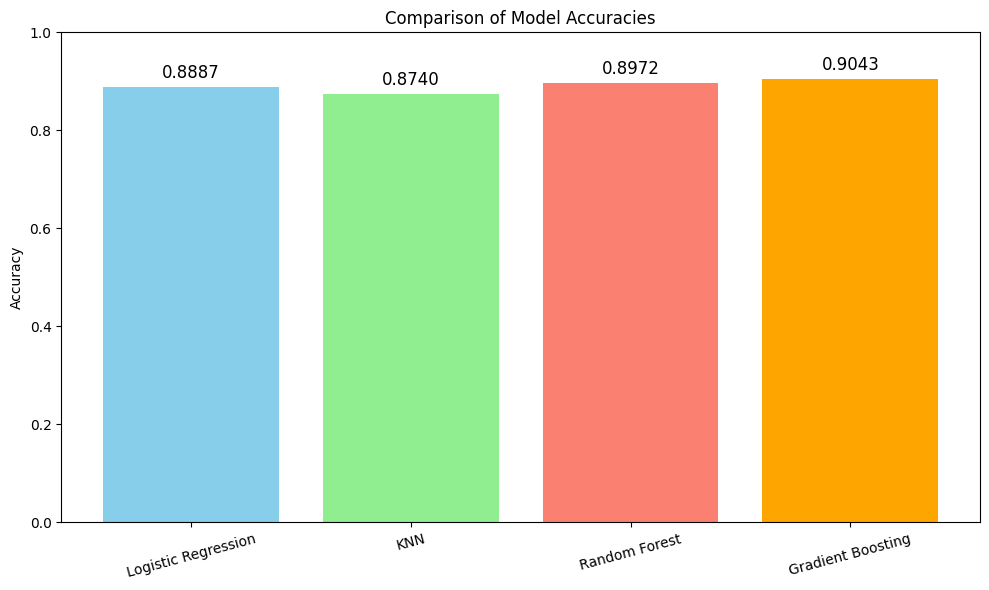

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Compute accuracies using correct variable names
lr_acc = accuracy_score(y_test, y_pred_lr)
knn_acc = accuracy_score(y_test, y_pred_knn)
rf_acc = accuracy_score(y_test, y_pred_rf)
gb_acc = accuracy_score(y_test, y_pred_gb)

# Prepare data for plotting
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting']
accuracies = [lr_acc, knn_acc, rf_acc, gb_acc]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Annotate each bar with its accuracy
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
# Class label mapping
label_mapping = {0: "Spiral", 1: "Elliptical", 2: "Uncertain"}

# Pick 5 sample inputs from test set
sample_inputs = X_test[:5]
actual_labels = y_test[:5]  # NumPy array

# Predict using the models
lr_preds = lr.predict(sample_inputs)
knn_preds = knn.predict(sample_inputs)
rf_preds = rf.predict(sample_inputs)
gb_preds = gb.predict(sample_inputs)

# Display results
for i in range(len(sample_inputs)):
    print(f"\n🧪 Sample {i+1}")
    print("Input Features:")
    for k, v in sample_inputs.iloc[i].to_dict().items():
        print(f"  {k}: {v}")
    print("Actual Label:   ", label_mapping[actual_labels[i]])
    print("LR Prediction:  ", label_mapping[lr_preds[i]])
    print("KNN Prediction: ", label_mapping[knn_preds[i]])
    print("RF Prediction:  ", label_mapping[rf_preds[i]])
    print("GB Prediction:  ", label_mapping[gb_preds[i]])



🧪 Sample 1
Input Features:
  NVOTE: 22.0
  P_EL: 0.955
  P_CW: 0.0
  P_ACW: 0.0
  P_EDGE: 0.045
  P_DK: 0.0
  P_MG: 0.0
  P_CS: 0.045
  P_EL_DEBIASED: 0.67
  P_CS_DEBIASED: 0.33
Actual Label:    Uncertain
LR Prediction:   Elliptical
KNN Prediction:  Elliptical
RF Prediction:   Elliptical
GB Prediction:   Elliptical

🧪 Sample 2
Input Features:
  NVOTE: 63.0
  P_EL: 0.667
  P_CW: 0.048
  P_ACW: 0.032
  P_EDGE: 0.206
  P_DK: 0.048
  P_MG: 0.0
  P_CS: 0.286
  P_EL_DEBIASED: 0.176
  P_CS_DEBIASED: 0.723
Actual Label:    Uncertain
LR Prediction:   Elliptical
KNN Prediction:  Uncertain
RF Prediction:   Uncertain
GB Prediction:   Uncertain

🧪 Sample 3
Input Features:
  NVOTE: 26.0
  P_EL: 0.846
  P_CW: 0.038
  P_ACW: 0.0
  P_EDGE: 0.038
  P_DK: 0.038
  P_MG: 0.038
  P_CS: 0.077
  P_EL_DEBIASED: 0.798
  P_CS_DEBIASED: 0.123
Actual Label:    Elliptical
LR Prediction:   Elliptical
KNN Prediction:  Elliptical
RF Prediction:   Elliptical
GB Prediction:   Elliptical

🧪 Sample 4
Input Features:
  NV

In [ ]:
# Predict class probabilities using Gradient Boosting
fuzzy_probs = gb.predict_proba(X_test)

# The predicted class labels
predicted_classes = gb.predict(X_test)

# Map the target labels to class names (adjust based on your dataset)
class_labels = ['Elliptical', 'Spiral', 'Uncertain']

# Display fuzzy logic interpretation for a few samples
for i in range(5):  # Display 5 samples
    print(f"\n🪐 Galaxy Sample {i+1}")
    print("Input Features:", X_test.iloc[i].to_dict())

    # Predicted class and its fuzzy probability
    predicted_index = predicted_classes[i]
    fuzzy_confidence = fuzzy_probs[i][predicted_index] * 100
    print(f"🔮 Predicted Morphology: {class_labels[predicted_index]}")
    print(f"📈 Confidence (Fuzzy Logic): {fuzzy_confidence:.2f}%")

    # Show full fuzzy breakdown (all class probabilities)
    print("\nFuzzy Class Probabilities:")
    for j, prob in enumerate(fuzzy_probs[i]):
        print(f"  - {class_labels[j]}: {prob*100:.2f}%")



🪐 Galaxy Sample 1
Input Features: {'NVOTE': 22.0, 'P_EL': 0.955, 'P_CW': 0.0, 'P_ACW': 0.0, 'P_EDGE': 0.045, 'P_DK': 0.0, 'P_MG': 0.0, 'P_CS': 0.045, 'P_EL_DEBIASED': 0.67, 'P_CS_DEBIASED': 0.33}
🔮 Predicted Morphology: Spiral
📈 Confidence (Fuzzy Logic): 68.71%

Fuzzy Class Probabilities:
  - Elliptical: 0.87%
  - Spiral: 68.71%
  - Uncertain: 30.42%

🪐 Galaxy Sample 2
Input Features: {'NVOTE': 63.0, 'P_EL': 0.667, 'P_CW': 0.048, 'P_ACW': 0.032, 'P_EDGE': 0.206, 'P_DK': 0.048, 'P_MG': 0.0, 'P_CS': 0.286, 'P_EL_DEBIASED': 0.176, 'P_CS_DEBIASED': 0.723}
🔮 Predicted Morphology: Uncertain
📈 Confidence (Fuzzy Logic): 65.44%

Fuzzy Class Probabilities:
  - Elliptical: 0.07%
  - Spiral: 34.48%
  - Uncertain: 65.44%

🪐 Galaxy Sample 3
Input Features: {'NVOTE': 26.0, 'P_EL': 0.846, 'P_CW': 0.038, 'P_ACW': 0.0, 'P_EDGE': 0.038, 'P_DK': 0.038, 'P_MG': 0.038, 'P_CS': 0.077, 'P_EL_DEBIASED': 0.798, 'P_CS_DEBIASED': 0.123}
🔮 Predicted Morphology: Spiral
📈 Confidence (Fuzzy Logic): 73.15%

Fuzzy Cla

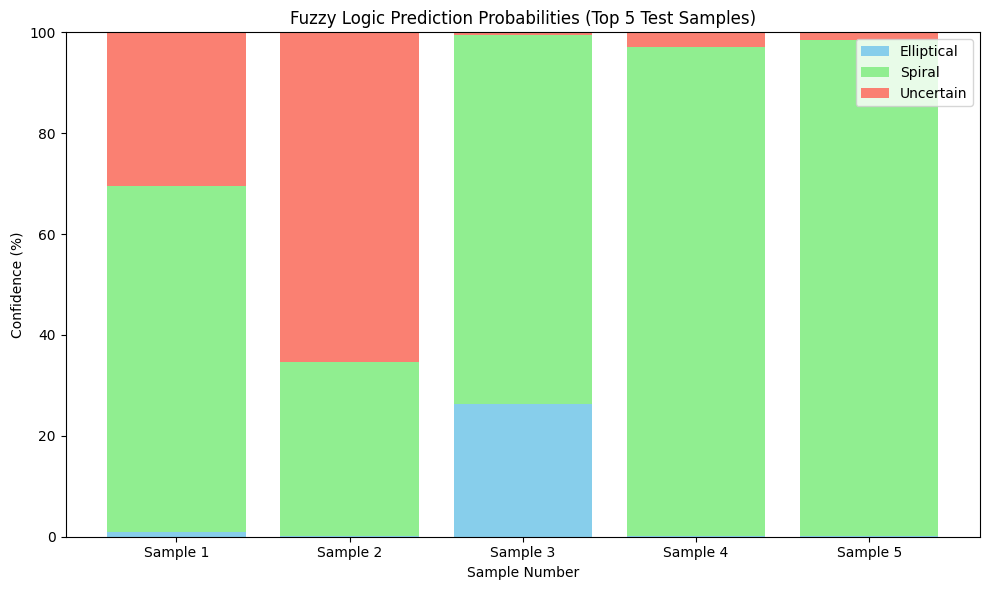

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select number of samples to visualize
num_samples = 5

# Get predicted probabilities
fuzzy_probs = gb.predict_proba(X_test)

# Class labels
class_labels = ['Elliptical', 'Spiral', 'Uncertain']

# Prepare data for stacked bar plot
sample_indices = np.arange(num_samples)
elliptical_conf = [prob[0] * 100 for prob in fuzzy_probs[:num_samples]]
spiral_conf     = [prob[1] * 100 for prob in fuzzy_probs[:num_samples]]
uncertain_conf  = [prob[2] * 100 for prob in fuzzy_probs[:num_samples]]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sample_indices, elliptical_conf, label='Elliptical', color='skyblue')
plt.bar(sample_indices, spiral_conf, bottom=elliptical_conf, label='Spiral', color='lightgreen')
bottom_vals = np.array(elliptical_conf) + np.array(spiral_conf)
plt.bar(sample_indices, uncertain_conf, bottom=bottom_vals, label='Uncertain', color='salmon')

plt.xlabel('Sample Number')
plt.ylabel('Confidence (%)')
plt.title('Fuzzy Logic Prediction Probabilities (Top 5 Test Samples)')
plt.xticks(sample_indices, [f'Sample {i+1}' for i in sample_indices])
plt.ylim(0, 100)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create updated base models
lr = LogisticRegression(max_iter=2000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)

# Ensemble model
ensemble_model = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn), ('rf', rf), ('gb', gb)],
    voting='soft'
)

# Train on scaled data
ensemble_model.fit(X_train_scaled, y_train)

# Predict and evaluate
ensemble_preds = ensemble_model.predict(X_test_scaled)

print("🎯 Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ensemble_preds))
print("\nClassification Report:\n", classification_report(y_test, ensemble_preds))


🎯 Ensemble Model Accuracy: 0.90185

Confusion Matrix:
 [[ 1524   337     0]
 [  288 11448   697]
 [    0   641  5065]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1861
           1       0.92      0.92      0.92     12433
           2       0.88      0.89      0.88      5706

    accuracy                           0.90     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.90      0.90      0.90     20000



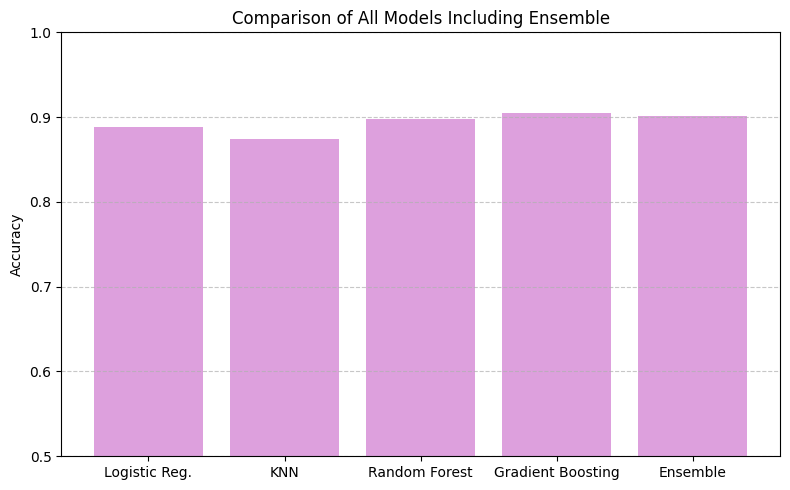

In [ ]:
# Append ensemble accuracy
ensemble_acc = accuracy_score(y_test, ensemble_preds)

# Update data
models = ['Logistic Reg.', 'KNN', 'Random Forest', 'Gradient Boosting', 'Ensemble']
accuracies = [lr_acc, knn_acc, rf_acc, gb_acc, ensemble_acc]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='plum')
plt.ylabel('Accuracy')
plt.title('Comparison of All Models Including Ensemble')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Sample input
sample_input_dict = {
    'NVOTE': 45.0,
    'P_EL': 0.81,
    'P_CW': 0.05,
    'P_ACW': 0.02,
    'P_EDGE': 0.07,
    'P_DK': 0.01,
    'P_MG': 0.0,
    'P_CS': 0.03,
    'P_EL_DEBIASED': 0.75,
    'P_CS_DEBIASED': 0.21
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input_dict])

# Scale the input
sample_scaled = scaler.transform(sample_df)

# Predict using ensemble model
predicted_class = ensemble_model.predict(sample_scaled)[0]

# Map class to morphology name
morphology_map = {0: 'Uncertain', 1: 'Spiral', 2: 'Elliptical'}
predicted_label = morphology_map[predicted_class]

# Print result
print("🔭 Predicted Galaxy Morphology:", predicted_label)


🔭 Predicted Galaxy Morphology: Spiral


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
<ipython-input-36-0f917b7a1298>:38: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from fo

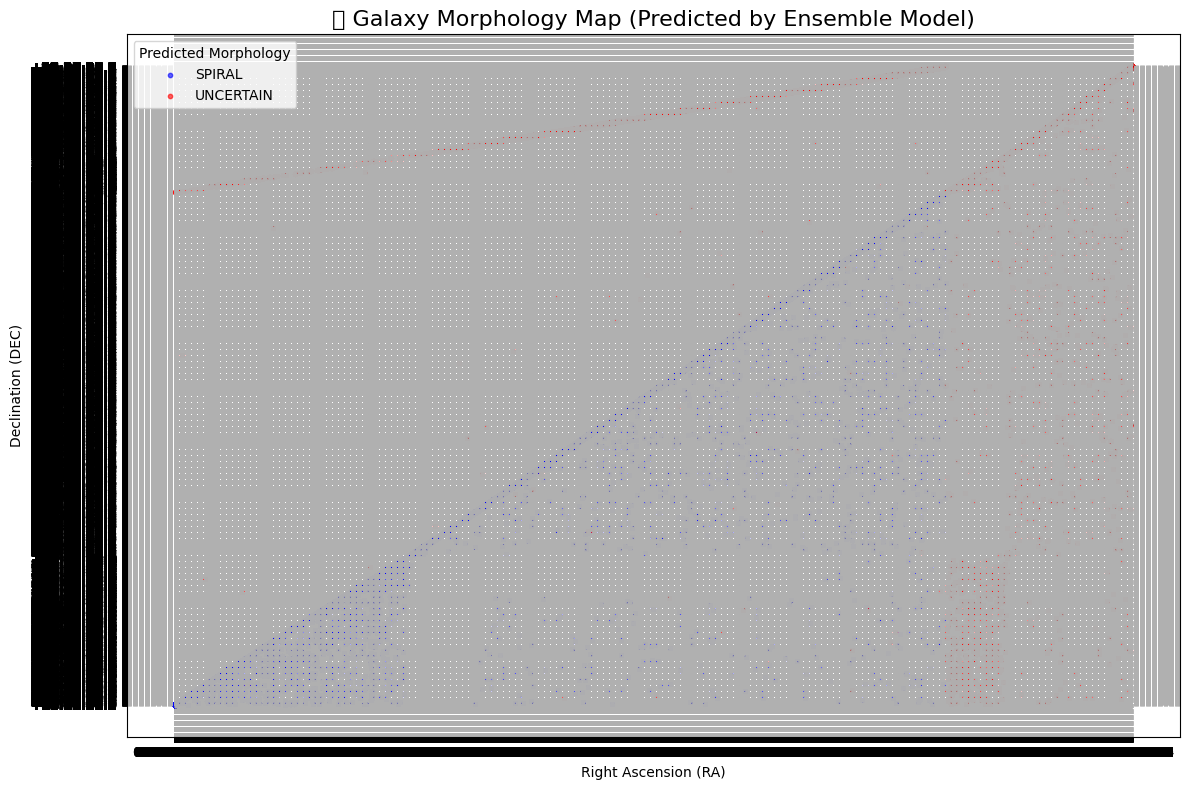

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Predict morphology using ensemble model
ensemble_preds = ensemble_model.predict(X)

# Step 2: Convert predicted class numbers to labels
class_labels = {0: 'ELLIPTICAL', 1: 'SPIRAL', 2: 'UNCERTAIN'}
predicted_morphology = pd.Series(ensemble_preds).map(class_labels)

# Step 3: Combine predictions with RA and DEC
galaxy_map_df = pd.DataFrame({
    'RA': df['RA'],
    'DEC': df['DEC'],
    'Predicted_Morphology': predicted_morphology
})

# Step 4: Plot the galaxy map
colors = {
    'SPIRAL': 'blue',
    'ELLIPTICAL': 'green',
    'UNCERTAIN': 'red'
}

plt.figure(figsize=(12, 8))
for morph_type, group in galaxy_map_df.groupby('Predicted_Morphology'):
    plt.scatter(group['RA'], group['DEC'],
                label=morph_type,
                alpha=0.6,
                color=colors[morph_type],
                s=10)

plt.title("🌌 Galaxy Morphology Map (Predicted by Ensemble Model)", fontsize=16)
plt.xlabel("Right Ascension (RA)")
plt.ylabel("Declination (DEC)")
plt.legend(title="Predicted Morphology")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print(df['RA'].dtype)
print(df['DEC'].dtype)


object
object


In [ ]:
# Convert to numeric and handle errors
df['RA'] = pd.to_numeric(df['RA'], errors='coerce')
df['DEC'] = pd.to_numeric(df['DEC'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['RA', 'DEC'])


In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u

coords = SkyCoord(ra=df['RA'].values * u.degree,
                  dec=df['DEC'].values * u.degree,
                  frame='icrs')


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models again
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)
svm = SVC(probability=True)

# Fit models (assuming X_train and y_train already defined)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(probability=True)

In [ ]:
ensemble = VotingClassifier(estimators=[
    ('lr', lr),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm)
], voting='soft')

ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X)

label_map = {0: 'ELLIPTICAL', 1: 'SPIRAL', 2: 'UNCERTAIN'}
df['Predicted_Morphology'] = [label_map[i] for i in y_pred_ensemble]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-45-6787658cb613>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Morphology'] = [label_map[i] for i in y_pred_ensemble]


ValueError: 'c' argument has 100000 elements, which is inconsistent with 'x' and 'y' with size 0.

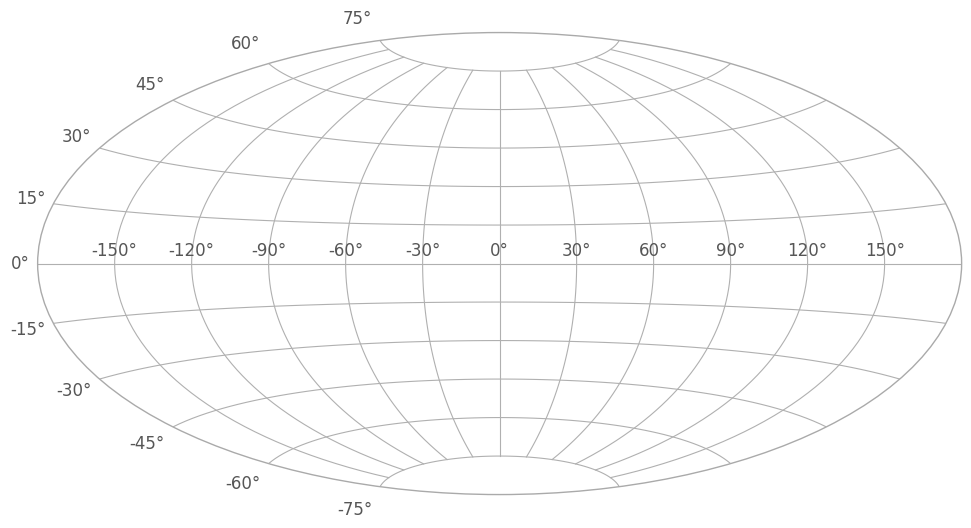

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import SkyCoord
import astropy.units as u

plt.style.use(astropy_mpl_style)

# Make sure RA/DEC are in degrees and convert to SkyCoord
coords = SkyCoord(ra=df['RA'].values * u.degree,
                  dec=df['DEC'].values * u.degree,
                  frame='icrs')

# Convert RA from 0-360 to -180 to 180 for better Aitoff projection
ra_rad = coords.ra.wrap_at(180 * u.degree).radian
dec_rad = coords.dec.radian

# Optional: color by predicted morphology
morph_colors = {
    'SPIRAL': 'blue',
    'ELLIPTICAL': 'orange',
    'UNCERTAIN': 'red'
}
colors = df['Predicted_Morphology'].map(morph_colors)

# Plot using an Aitoff projection
plt.figure(figsize=(12, 6))
plt.subplot(111, projection="aitoff")
plt.grid(True)

plt.scatter(ra_rad, dec_rad, s=2, c=colors, alpha=0.5)

plt.title('Celestial Map of Galaxies by Predicted Morphology')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DEC)')

# Legend
for morph, color in morph_colors.items():
    plt.scatter([], [], c=color, label=morph, s=10)
plt.legend(title="Predicted Morphology", loc="upper right")

plt.tight_layout()
plt.show()
